In [2]:
import pandas as pd
from skimage import color
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import cPickle as pickle
from skimage import measure
import pandas as pd
import custom_image_toolkit as C
import skimage
from skimage import morphology
import scipy
from skimage import feature
import seaborn as sns
from skimage import exposure
from skimage import filters
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.datasets import make_moons, make_circles, make_classification

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [229]:
with open('./access_files/cells.pkl', 'rb') as input:
    c1 = pickle.load(input)
with open('./access_files/cells_fl.pkl', 'rb') as input:
    c2 = pickle.load(input)
with open('./access_files/cells_v1.pkl', 'rb') as input:
    c3 = pickle.load(input)

In [251]:
i=20
print c2[i].frames, c2[i].fluor_chars, c2[i].segment_coords

[3] [0] [array([[118, 444],
       [118, 445],
       [118, 446],
       [118, 447],
       [118, 448],
       [118, 449],
       [118, 450],
       [119, 442],
       [119, 443],
       [119, 444],
       [119, 445],
       [119, 446],
       [119, 447],
       [119, 448],
       [119, 449],
       [119, 450],
       [119, 451],
       [119, 452],
       [120, 441],
       [120, 442],
       [120, 443],
       [120, 444],
       [120, 445],
       [120, 446],
       [120, 447],
       [120, 448],
       [120, 449],
       [120, 450],
       [120, 451],
       [120, 452],
       [120, 453],
       [120, 454],
       [121, 440],
       [121, 441],
       [121, 442],
       [121, 443],
       [121, 444],
       [121, 445],
       [121, 446],
       [121, 447],
       [121, 448],
       [121, 449],
       [121, 450],
       [121, 451],
       [121, 452],
       [121, 453],
       [121, 454],
       [122, 439],
       [122, 440],
       [122, 441],
       [122, 442],
       [122, 443],
   

In [249]:
c2[0].segment_

[[]]

In [232]:
c1[0].fluor_chars

[0]

In [226]:
c1[0].fluor_chars

[0]

In [38]:
l=dir(c[0])[26]

In [94]:
c[1].nuclear_whi5

[0]

In [93]:
[obj.nuclear_whi5[0]==0 for obj in c]

[False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 Fal

In [90]:
l1 = np.nonzero([obj.nuclear_whi5==0 for obj in c])

In [104]:
getattr(obj, att)

0

In [116]:
expt_conds = ['/yFB78_125uMGal', '/yFB79_125uMGal']
expt_conds[0][1:]

'yFB78_125uMGal'

In [119]:
data_vals[0]+[expt_conds[0][1:]]

[211,
 40.87812860993454,
 1073.7109886407393,
 106160.5,
 2788427.4375,
 1670.0804839048653,
 2,
 1,
 626.883487654321,
 4125.791666666667,
 50777.5625,
 334189.125,
 1,
 156938.0625,
 3122616.5625,
 157849.0,
 3149086.0,
 'yFB78_125uMGal']

In [100]:
obj=c[0]
data_vals = [getattr(obj, att)[0] for att in l]

TypeError: 'int' object has no attribute '__getitem__'

In [120]:
l=dir(c[0])[19:]
cols = []
for att in l:
    if type(getattr(c[1],att)) is list:
#         print type(getattr(c[0],att)[0])
        if (type(getattr(c[1],att)[0]) in set([np.int64, np.float, np.float64, float, int])):
#             print att, getattr(c[1],att)[0], type(getattr(c[0],att)[0])
            cols.append(att)

In [121]:
data_vals = [[getattr(obj, att)[0] for att in cols] for obj in c]

In [193]:
y=pd.DataFrame(data={'d':[1,2,3],'y':[4,5,6],'z':['hi','ne','ze']})

In [223]:
y.at[y.z=='hi','d']=1
if(y.loc[y.z=='ne','d'][1]):
    print 'bye'

bye


In [221]:
y

,d,y,z
0,1.0,4,hi
1,2.0,5,ne
2,3.0,6,ze


In [149]:
(y[y['z']=='hi']==1).any().any()

True

In [198]:
# y[]['d'][0]=2
z=y['d'][y['z']=='hi'].at[0]=2

In [205]:
y.at[y.z=='hi', 'd']=4.727

In [206]:
y

,d,y,z
0,4.727,4,hi
1,2.000,5,ne
2,3.000,6,ze


In [200]:
y.at['z'='hi','d']=3

SyntaxError: invalid syntax (<ipython-input-200-5e19e35d337c>, line 1)

In [195]:
y

,d,y,z
0,1,4,hi
1,2,5,ne
2,3,6,ze


In [196]:
y.at[0,'d']=2

In [122]:
cols

['area',
 'cytoplasmic_fluor_av',
 'cytoplasmic_fluor_av_c2',
 'cytoplasmic_fluor_int',
 'cytoplasmic_fluor_int_c2',
 'ellipse_volume',
 'frames',
 'index_image',
 'nuclear_fluor_av',
 'nuclear_fluor_av_c2',
 'nuclear_fluor_int',
 'nuclear_fluor_int_c2',
 'nuclear_whi5',
 'pixel_thresh_fluor_vals',
 'pixel_thresh_fluor_vals_c2',
 'zproj_fluor_vals',
 'zproj_fluor_vals_c2']

In [84]:
type(c[0].cytoplasmic_fluor_av[0])

numpy.float64

In [79]:
type(c[0].area[0])==np.int64

True

False

In [44]:
c[0].segment_coords[0].dtype

dtype('int64')

In [40]:
l

'ellipse_fit'

In [22]:
if not(set(zip(*c[0].segment_coords[0])[0]).intersection(set([0,246,511]))):
    print 'HI'

In [29]:
l

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_fluor_placeholders',
 'area',
 'cellCount',
 'coords',
 'cytoplasmic_fluor_av',
 'cytoplasmic_fluor_av_c2',
 'cytoplasmic_fluor_int',
 'cytoplasmic_fluor_int_c2',
 'ellipse_fit',
 'ellipse_volume',
 'exists',
 'fluor_chars',
 'frames',
 'index',
 'index_image',
 'next_frame',
 'nuclear_coords',
 'nuclear_fluor_av',
 'nuclear_fluor_av_c2',
 'nuclear_fluor_int',
 'nuclear_fluor_int_c2',
 'nuclear_whi5',
 'pixel_thresh_coords',
 'pixel_thresh_fluor_vals',
 'pixel_thresh_fluor_vals_c2',
 'position',
 'segment_coords',
 'type',
 'zproj_fluor_vals',
 'zproj_fluor_vals_c2']

In [28]:
l[18:]

['add_fluor_placeholders',
 'area',
 'cellCount',
 'coords',
 'cytoplasmic_fluor_av',
 'cytoplasmic_fluor_av_c2',
 'cytoplasmic_fluor_int',
 'cytoplasmic_fluor_int_c2',
 'ellipse_fit',
 'ellipse_volume',
 'exists',
 'fluor_chars',
 'frames',
 'index',
 'index_image',
 'next_frame',
 'nuclear_coords',
 'nuclear_fluor_av',
 'nuclear_fluor_av_c2',
 'nuclear_fluor_int',
 'nuclear_fluor_int_c2',
 'nuclear_whi5',
 'pixel_thresh_coords',
 'pixel_thresh_fluor_vals',
 'pixel_thresh_fluor_vals_c2',
 'position',
 'segment_coords',
 'type',
 'zproj_fluor_vals',
 'zproj_fluor_vals_c2']

In [7]:
print str(01).zfill(3)

001


In [4]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html. Accessed 2/7/19.
C=GaussianProcessClassifier(1.0 * RBF(1.0))
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

/home/felix/anaconda2/lib/python2.7/site-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


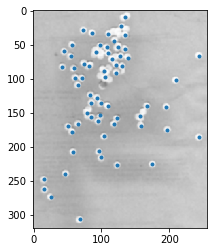

In [5]:
im2 = io.imread('./access_files/Circles002.jpg')
plt.imshow(im2)
im3 = skimage.filters.gaussian(im2, sigma=1)
plt.imshow(im3)
temp=skimage.feature.blob_log(im3, min_sigma=2.0, max_sigma=5.0, num_sigma=10, threshold=0.1, overlap=0.5, log_scale=False)
plt.plot(zip(*temp)[1],zip(*temp)[0],'.')
plt.show()

In [6]:
scene, frame, bkgd = 1, 20, 15
impath = '/scratch/lab/image_analysis_scratch/181207_yFB79_60X_Raff_125uMGal/timelapse/181207_yFB79_60X_Raff_125uMGal_w2515 laser 10_s{0}_t{1}.TIF'.format(scene,frame)
impath1 = '/scratch/lab/image_analysis_scratch/181207_yFB79_60X_Raff_125uMGal/timelapse/181207_yFB79_60X_Raff_125uMGal_w2515 laser 10_s{0}_t{1}.TIF'.format(bkgd,frame)
image=io.imread(impath)
bk_im = io.imread(impath1)
image = image-np.tile(np.mean(bk_im,axis=0), [image.shape[0],1,1])

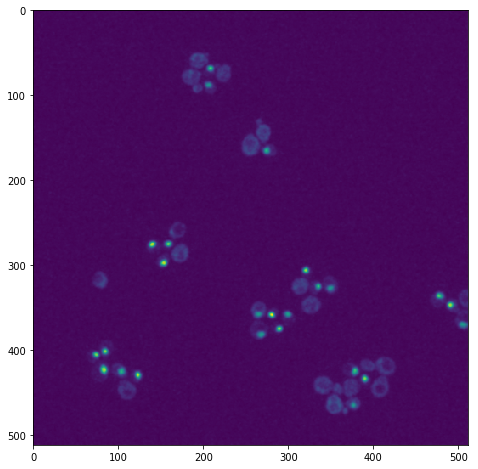

In [7]:
fig=plt.figure(figsize=[8,8])
image1 = skimage.filters.gaussian(image, sigma=1)
plt.imshow(np.amax(image1,axis=0))
plt.show()

/home/felix/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


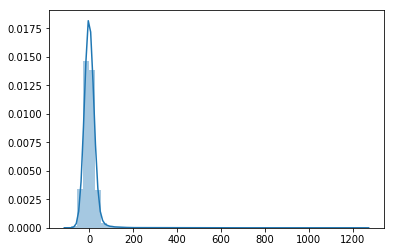

In [8]:
sns.distplot(np.array(image.flatten()))
plt.show()

In [29]:
scene, frame, bkgd = 7, 50, 15
# impath = '/scratch/lab/image_analysis_scratch/181207_yFB79_60X_Raff_125uMGal/timelapse/181207_yFB79_60X_Raff_125uMGal_w2515 laser 10_s{0}_t{1}.TIF'.format(scene,frame)
impath = '/scratch/lab/image_analysis_scratch/181114_yFB78_Raff_125Gal/timelapse/181114_yFB78_60X_2Raff_125Gal__w2515 laser 10_s{0}_t{1}.TIF'.format(scene,frame)
impath1 = '/scratch/lab/image_analysis_scratch/181207_yFB79_60X_Raff_125uMGal/timelapse/181207_yFB79_60X_Raff_125uMGal_w2515 laser 10_s{0}_t{1}.TIF'.format(bkgd,frame)
image=io.imread(impath)
bk_im = io.imread(impath1)
# image = image-np.tile(np.mean(bk_im,axis=0), [image.shape[0],1,1])
image1 = skimage.filters.gaussian(image*(image>0), sigma=1)
# image2 = exposure.equalize_hist(image1)

47


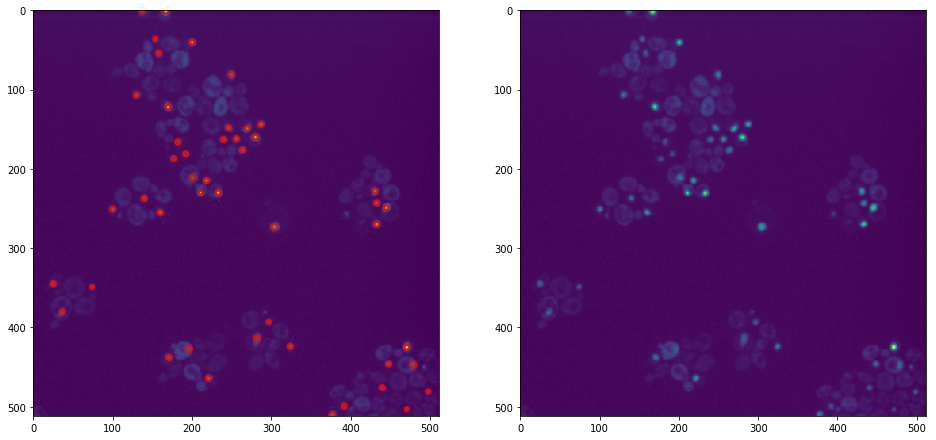

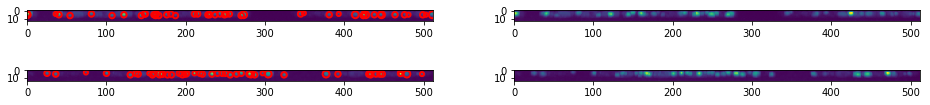

In [35]:
temp=skimage.feature.blob_log(image1, min_sigma=1.0, max_sigma=3.5, num_sigma=6, threshold=0.002, overlap=0.01, log_scale=False)
print len(temp)
fig=plt.figure(figsize=[16,8])
ax = plt.subplot(1,2,1)
# vals=zip(*temp)
plt.imshow(np.amax(image1,axis=0))
for blob in temp:
#     print blob
    z, y, x, r = blob
    c = plt.Circle((x, y), 1.1*np.sqrt(2)*r, color='r', linewidth=2, fill=False)
    ax.add_patch(c)
# plt.scatter(zip(*temp)[1],zip(*temp)[0],marker='o',c='r',s=(2*np.asarray(vals[2])**2)**2)
ax=plt.subplot(1,2,2)
plt.imshow(np.amax(image1,axis=0))
extent = fig.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('/home/felix/Dropbox/blob_detection1.png', bbox_inches=extent)
# orthogonal views
fig=plt.figure(figsize=[16,2])
ax = plt.subplot(2,2,1)
# vals=zip(*temp)
plt.imshow(np.amax(image1,axis=2))
for blob in temp:
#     print blob
    z, y, x, r = blob
    c = plt.Circle((y, z), np.sqrt(3)*r, color='r', linewidth=2, fill=False)
#     print (z,y)
    ax.add_patch(c)
# plt.scatter(zip(*temp)[1],zip(*temp)[0],marker='o',c='r',s=(2*np.asarray(vals[2])**2)**2)
ax=plt.subplot(2,2,2)
plt.imshow(np.amax(image1,axis=2))
ax = plt.subplot(2,2,3)
# vals=zip(*temp)
plt.imshow(np.amax(image1,axis=1))
for blob in temp:
#     print blob
    z, y, x, r = blob
    c = plt.Circle((x, z), np.sqrt(3)*r, color='r', linewidth=2, fill=False)
#     print (z,y)
    ax.add_patch(c)
# plt.scatter(zip(*temp)[1],zip(*temp)[0],marker='o',c='r',s=(2*np.asarray(vals[2])**2)**2)
ax=plt.subplot(2,2,4)
plt.imshow(np.amax(image1,axis=1))
fig.savefig('/home/felix/Dropbox/blob_detection.png')

In [23]:
scene, bkgd = 30, 1
impath = '/scratch/lab/image_analysis_scratch/190322_yFB78_yFB79_CSM_Raff_Gal/yFB78_125uMGal/190322_60X_yFB78_1XCSM_2Raff_125Gal_scene__w2515 laser 30_s{0}.TIF'.format(scene)
impath1 = '/scratch/lab/image_analysis_scratch/190322_yFB78_yFB79_CSM_Raff_Gal/yFB78_125uMGal/190322_60X_yFB78_1XCSM_2Raff_125Gal_scene__w2515 laser 30_s{0}.TIF'.format(bkgd)
image=io.imread(impath)
bk_im = io.imread(impath1)
# image = image-np.tile(np.mean(bk_im,axis=0), [image.shape[0],1,1])
image1 = skimage.filters.gaussian(image*(image>0), sigma=1)
# image2 = exposure.equalize_hist(image1)

7


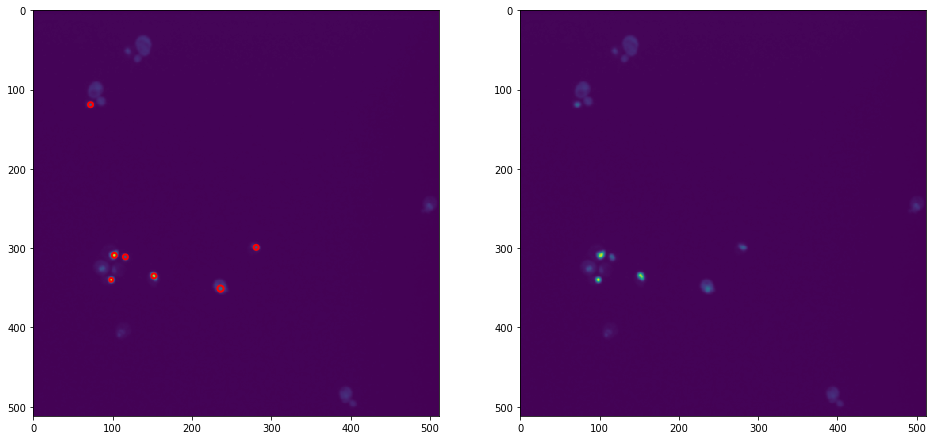

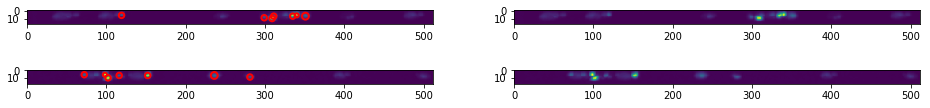

In [25]:
temp=skimage.feature.blob_log(image1, min_sigma=1.0, max_sigma=3.5, num_sigma=6, threshold=0.007, overlap=0.005, log_scale=False)
print len(temp)
fig=plt.figure(figsize=[16,8])
ax = plt.subplot(1,2,1)
# vals=zip(*temp)
plt.imshow(np.amax(image1,axis=0))
for blob in temp:
#     print blob
    z, y, x, r = blob
    c = plt.Circle((x, y), 1.1*np.sqrt(2)*r, color='r', linewidth=2, fill=False)
    ax.add_patch(c)
# plt.scatter(zip(*temp)[1],zip(*temp)[0],marker='o',c='r',s=(2*np.asarray(vals[2])**2)**2)
ax=plt.subplot(1,2,2)
plt.imshow(np.amax(image1,axis=0))
plt.show()
# orthogonal views
fig=plt.figure(figsize=[16,2])
ax = plt.subplot(2,2,1)
# vals=zip(*temp)
plt.imshow(np.amax(image1,axis=2))
for blob in temp:
#     print blob
    z, y, x, r = blob
    c = plt.Circle((y, z), np.sqrt(3)*r, color='r', linewidth=2, fill=False)
#     print (z,y)
    ax.add_patch(c)
# plt.scatter(zip(*temp)[1],zip(*temp)[0],marker='o',c='r',s=(2*np.asarray(vals[2])**2)**2)
ax=plt.subplot(2,2,2)
plt.imshow(np.amax(image1,axis=2))
ax = plt.subplot(2,2,3)
# vals=zip(*temp)
plt.imshow(np.amax(image1,axis=1))
for blob in temp:
#     print blob
    z, y, x, r = blob
    c = plt.Circle((x, z), np.sqrt(3)*r, color='r', linewidth=2, fill=False)
#     print (z,y)
    ax.add_patch(c)
# plt.scatter(zip(*temp)[1],zip(*temp)[0],marker='o',c='r',s=(2*np.asarray(vals[2])**2)**2)
ax=plt.subplot(2,2,4)
plt.imshow(np.amax(image1,axis=1))
plt.show()

In [26]:
x=np.load('./access_files/completed_samples.npy')
y=np.load('./access_files/samples.npy')
print x, y

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.] [81 30 67 49 84 43 40 14 96 39 18 47 45 13 91 74 85 28 75 44 20 86 51 88
 36  9 92  6 42 22]


[]


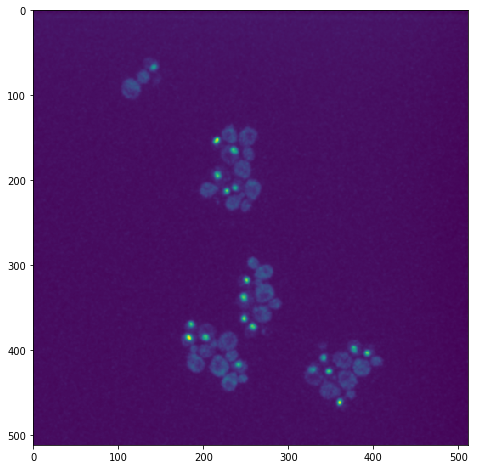

In [18]:
scene, frame = 2, 20
impath = '/scratch/lab/image_analysis_scratch/181207_yFB79_60X_Raff_125uMGal/timelapse/181207_yFB79_60X_Raff_125uMGal_w2515 laser 10_s{0}_t{1}.TIF'.format(scene,frame)
image=io.imread(impath)
image1 = skimage.filters.gaussian(np.amax(image,axis=0), sigma=1)
temp=skimage.feature.blob_doh(image1, min_sigma=1.0, max_sigma=30.0, num_sigma=10, threshold=0.01, overlap=0.5, log_scale=False)
print temp
fig=plt.figure(figsize=[8,8])
ax = plt.subplot(1,1,1)
# vals=zip(*temp)
plt.imshow(image1)
for blob in temp:
#     print blob
    y, x, z = blob
    c = plt.Circle((x, y), 5.0, color='r', linewidth=2, fill=False)
    ax.add_patch(c)
# plt.scatter(zip(*temp)[1],zip(*temp)[0],marker='o',c='r',s=(2*np.asarray(vals[2])**2)**2)
plt.show()

In [19]:
temp=skimage.feature.blob_doh(np.amax(image,axis=0)*1.0/np.amax(image), min_sigma=1, max_sigma=20, num_sigma=10, threshold=0.01, overlap=0.5, log_scale=False)

/home/felix/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


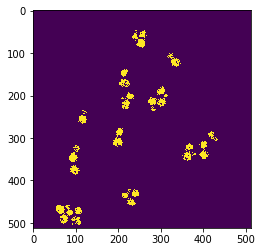

/home/felix/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


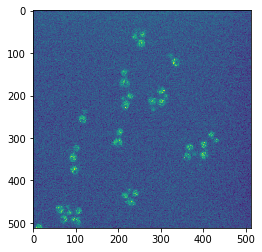

/home/felix/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


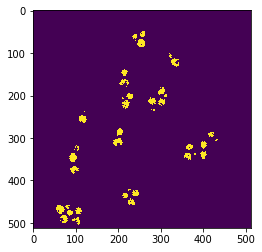

In [21]:
scene, frame, cell = 1, 1, 2
impath = '/scratch/lab/image_analysis_scratch/180910_pACT1_mKate2/timelapse/180910_yFB11_12_mated_hap3_1_60X_5min_10lp_v1_w3594 laser 10_s1_t1.TIF'
image=io.imread(impath)
temp_path='/scratch/lab/image_analysis_scratch/180910_pACT1_mKate2/timelapse/scene_1/outputs/images/cell_fluor_plots'
mask=np.zeros([12,512,512])
for i0 in range(0,42):
    temp_mask=np.load(temp_path+'/scene{0}_frame_{1}_cell_{2}.npy'.format(scene, frame, i0))
#     temp_mask=scipy.ndimage.morphology.binary_fill_holes(temp_mask)
    mask+=temp_mask
image1 = image
image1[np.nonzero(mask)]==np.max(image)

# for i0 in range(mask.shape[0]):
i0=8
fig=plt.plot(size=[1,1])
ax = plt.subplot(1,1,1)
ax.imshow(mask[i0,:,:])
del fig
plt.show()
fig=plt.plot(size=[1,1])
ax = plt.subplot(1,1,1)
plt.imshow(image[i0, :, :])
# ax=plt.subplot(1,3,3)
# plt.imshow(image1[i0, :, :])
plt.show()
del fig
mask1=skimage.morphology.binary_erosion(mask)
mask1=skimage.morphology.binary_dilation(mask1)
fig=plt.plot(size=[1,1])
ax = plt.subplot(1,1,1)
ax.imshow(mask1[i0,:,:])
plt.show()
del fig

/home/felix/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


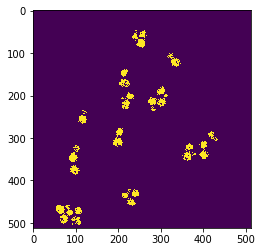

/home/felix/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


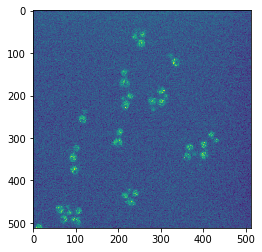

/home/felix/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


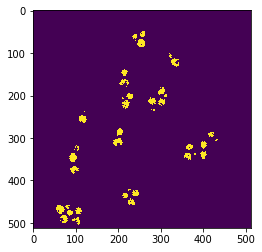

In [22]:
scene, frame, cell = 1, 1, 2
impath = '/scratch/lab/image_analysis_scratch/180910_pACT1_mKate2/timelapse/180910_yFB11_12_mated_hap3_1_60X_5min_10lp_v1_w3594 laser 10_s1_t1.TIF'
image=io.imread(impath)
temp_path='/scratch/lab/image_analysis_scratch/180910_pACT1_mKate2/timelapse/scene_1/outputs/images/cell_fluor_plots'
mask=np.zeros([12,512,512])
for i0 in range(0,42):
    temp_mask=np.load(temp_path+'/scene{0}_frame_{1}_cell_{2}.npy'.format(scene, frame, i0))
#     temp_mask=scipy.ndimage.morphology.binary_fill_holes(temp_mask)
    mask+=temp_mask
image1 = image
image1[np.nonzero(mask)]==np.max(image)

# for i0 in range(mask.shape[0]):
i0=8
fig=plt.plot(size=[1,1])
ax = plt.subplot(1,1,1)
ax.imshow(mask[i0,:,:])
del fig
plt.show()
fig=plt.plot(size=[1,1])
ax = plt.subplot(1,1,1)
plt.imshow(image[i0, :, :])
# ax=plt.subplot(1,3,3)
# plt.imshow(image1[i0, :, :])
plt.show()
del fig
mask1=skimage.morphology.binary_erosion(mask)
mask1=skimage.morphology.binary_dilation(mask1)
fig=plt.plot(size=[1,1])
ax = plt.subplot(1,1,1)
ax.imshow(mask1[i0,:,:])
plt.show()
del fig

In [23]:
scene, frame = 1, 40
impath = '/scratch/lab/image_analysis_scratch/181207_yFB79_60X_Raff_125uMGal/timelapse/181207_yFB79_60X_Raff_125uMGal_w3594 laser 10_s{0}_t{1}.TIF'.format(scene, frame)
image=io.imread(impath)
temp_path='/scratch/lab/image_analysis_scratch/181207_yFB79_60X_Raff_125uMGal/timelapse/scene_{0}/outputs/cells_scene_{0}_v3.pkl'.format(scene)
with open(temp_path, 'rb') as input:
    c = pickle.load(input)
# c= pickle.load(temp_path)
# temp_im=np.load(impath)
mask=np.zeros(image.shape)
for obj in c:
    if frame in obj.frames:
        mask[obj.pixel_thresh_coords[frame-obj.frames[0]]]=1
#     temp_mask=scipy.ndimage.morphology.binary_fill_holes(temp_mask)
# image1 = image
# image1[np.nonzero(mask)]==np.max(image)

# # for i0 in range(mask.shape[0]):
# i0=8
# fig=plt.plot(size=[1,1])
# ax = plt.subplot(1,1,1)
# ax.imshow(mask[i0,:,:])
# del fig
# plt.show()
# fig=plt.plot(size=[1,1])
# ax = plt.subplot(1,1,1)
# plt.imshow(image[i0, :, :])
# # ax=plt.subplot(1,3,3)
# # plt.imshow(image1[i0, :, :])
# plt.show()
# del fig
# mask1=skimage.morphology.binary_erosion(mask)
# mask1=skimage.morphology.binary_dilation(mask1)
# fig=plt.plot(size=[1,1])
# ax = plt.subplot(1,1,1)
# ax.imshow(mask1[i0,:,:])
# plt.show()
# del fig

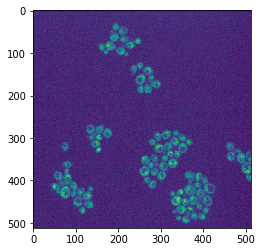

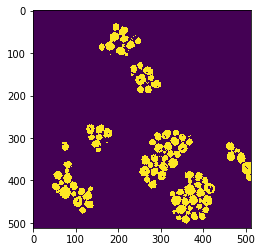

In [24]:
plt.imshow(image[6,:,:])
plt.show()
plt.imshow(mask[6,:,:])
plt.show()

In [25]:
x=np.array([[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]]])

In [26]:
len(np.nonzero(x>4))

3

In [27]:
temp=pd.read_csv('cell_coords_scene_1_frame_12.txt',sep='\t')

In [28]:
max(0.01,-0.02)

0.01

In [29]:
len(0)

TypeError: object of type 'int' has no len()

In [ ]:
with open('./access_files/cells_scene_3_v3.pkl', 'rb') as input:
    c = pickle.load(input)
with open('./access_files/cell_cycles_filtered.pkl', 'rb') as input:
    cc = pickle.load(input)

In [ ]:
inds=[obj.index for obj in c]
print c[inds.index(39)].frames, c[inds.index(39)].frames.index(55)
print c[inds.index(39)].pixel_thresh_coords[53]
print c[inds.index(39)].position[53]
# print c[]
for obj in c[inds.index(39)].pixel_thresh_coords:
    print len(obj)

In [ ]:
cc[0].segment_coords[0].shape
for i0 in range(len(cc)):
    cc[i0].pixel_thresh_vol = []
    for i1 in range(len(cc[i0].frames)):
        cc[i0].pixel_thresh_vol.append(len(cc[i0].pixel_thresh_coords[i1][0]))

In [72]:
len(cc)

425

In [71]:
cc[0].bud

445

In [34]:
v=np.ones([100,100,100])
y = np.array([[1,1],[3,4],[6,7]])
print y.shape
print zip(*y)
np.sum(v[:, y[:,0], y[:,1]])

(3, 2)
[(1, 3, 6), (1, 4, 7)]


300.0

In [21]:
a = set([-1,-2])
if a.intersection(zip(*cc[0].segment_coords[0])[0]):
    print 'Bue'

In [23]:
filt_cc = [obj for obj in cc if obj.label_type == ind and obj.complete and not(obj.error) and
           not(obj.daughter is None)]

NameError: name 'ind' is not defined

In [15]:
r=range(5,10)
for i, e in enumerate(r):
    print i

0
1
2
3
4


In [9]:
C.study_cell(c[0])

Cell number:  1
Index image [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Frames [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]
position [array([ 162.83410138,  225.33179724]), array([ 165.75,  226.45]), array([ 170.47555556,  226.79555556]), array([ 171.08898305,  226.11864407]), array([ 171.50209205,  227.45188285]), array([ 170.76679842,  226.90513834]), array([ 170.80524345,  227.01872659]), array([ 170.19927536,  227.48188406]), array([ 170.62962963,  227.74444444]), array([ 169.51495017,  227.10299003]), array([ 168.11904762,  228.41156463]), array([ 163.3884058 ,  223.7304347

In [9]:
y=np.random.normal(size=[5,5])
z=y>0.0
print z

[[ True False  True  True False]
 [ True  True False False  True]
 [False  True  True False False]
 [False  True False False False]
 [False  True False  True False]]


In [31]:
u=np.array([0,1,0,0,0])
v=np.array([0,0,1,1,0])
print v, np.nonzero(v)[0][np.nonzero(u)][0]

[0 0 1 1 0] 3


In [32]:
np.argmin(u==0)

1

In [22]:
np.sum(v[np.nonzero(z[:,0])]==1)==0

True

In [71]:
f = open('text_file.txt','a')
f.write('\ncell1\tX\tY')
f.close()

In [86]:
x=np.zeros([10,10])
y=np.nonzero(np.array([0,0,1,0]))
print y[0][0]

2


In [87]:
b=np.array([True, True])
np.sum(b)

2

In [ ]:
np.nonzer

In [82]:
a= x>-1
np.sum(a,axis=0)

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

In [61]:
print temp[temp.cell==27]['Y'].iloc[0]

312.0


In [14]:
d=np.arange(10)
temp_inds = np.nonzero(d>3)
print d, temp_inds
print sum(d[temp_inds]>7), len(temp_inds[0])

[0 1 2 3 4 5 6 7 8 9] (array([4, 5, 6, 7, 8, 9]),)
2 6


In [20]:
temp=input('What is your name')
print temp

What is your name'y'
y


In [14]:
b=np.random.normal(size=10000)
sum(b>0.0)

5065

In [92]:
with open('./cells_scene_1_v3.pkl', 'rb') as input:
    c = pickle.load(input)

In [96]:
x=zip(*c[0].segment_coords[0])

[autoreload of custom_image_toolkit failed: Traceback (most recent call last):
  File "/home/felix/anaconda2/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "custom_image_toolkit.py", line 1579
    if
      ^
SyntaxError: invalid syntax
]


In [106]:
print bool(set([0, 511]).intersection(set(x[0])))

False


In [69]:
with open('./cell_cycles_compiled.pkl', 'rb') as input:
    c = pickle.load(input)
c1 = [obj for obj in c if obj.complete and not obj.daughter is None]

In [107]:
[1,2,3].index(3)

2

In [39]:
120%20

0

In [46]:
b=np.array([[0.0,0.5],[0.2,1.0]])
b2 = np.repeat(b[:, :, np.newaxis], 3, axis=2)

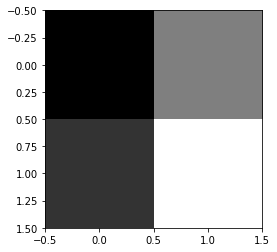

In [51]:
plt.imshow(b2)
plt.show()

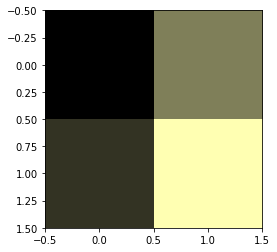

In [53]:
plt.imshow(b2*np.array([1.0,1.0,0.7]))
plt.show()

In [56]:
b3=b2*np.array([1.0,1.0,0.7])
b3[:,:,2]

array([[ 0.  ,  0.35],
       [ 0.14,  0.7 ]])

In [61]:
type(cm.tab20(0)[:3])

tuple

In [48]:
b2[:,:,2]

array([[ 0. ,  0.5],
       [ 0.2,  1. ]])

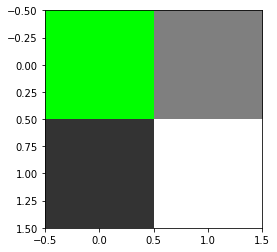

In [37]:
b=np.array([[0.0,0.5],[0.2,1.0]])
b1=np.zeros([2,2, 3])
for i0 in range(3):
    b1[:,:, i0]=b
b1[0,0,1]=1.0
plt.imshow(b1)
plt.show()

In [112]:
np.full([5,10], np.nan)

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]])

In [121]:
x=np.zeros([10,1])
y=np.repeat(x,10,axis=1)
print y[:,0].shape, x.shape
z=np.reshape(y[:,0],[10,1])
np.repeat(z,10,axis=1)

(10,) (10, 1)


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [66]:
base_path, expt_path = '/scratch/lab/image_analysis_scratch', '/180802_staining_mix_expt/timelapse'
image_filename, bf_filename, fl_filename = '/180802_yFB30dyed_yFB45_60X_10min__', \
                                           'w1Brightfield confocal_', \
                                           'w2515 laser 10_'  # note to change fluorescence path to match laser power
temp_im = io.imread(base_path+expt_path+'/scene_{0}'.format(1)+image_filename+bf_filename+'s1_t01.TIF')/65535.0

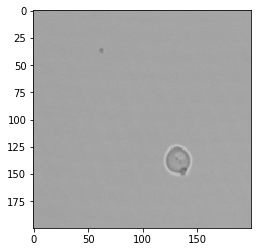

In [89]:
plt.imshow(np.repeat(temp_im[0:200,0:200,np.newaxis], 3, axis=2))
plt.show()

In [76]:
zip(*c[0].segment_coords[0])[0]

(217,
 218,
 218,
 218,
 218,
 218,
 218,
 218,
 219,
 219,
 219,
 219,
 219,
 219,
 219,
 219,
 219,
 219,
 220,
 220,
 220,
 220,
 220,
 220,
 220,
 220,
 220,
 220,
 220,
 220,
 221,
 221,
 221,
 221,
 221,
 221,
 221,
 221,
 221,
 221,
 221,
 221,
 221,
 221,
 221,
 222,
 222,
 222,
 222,
 222,
 222,
 222,
 222,
 222,
 222,
 222,
 222,
 222,
 222,
 222,
 222,
 223,
 223,
 223,
 223,
 223,
 223,
 223,
 223,
 223,
 223,
 223,
 223,
 223,
 223,
 223,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 225,
 225,
 225,
 225,
 225,
 225,
 225,
 225,
 225,
 225,
 225,
 225,
 225,
 225,
 225,
 225,
 225,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 226,
 227,
 227,
 227,
 227,
 227,
 227,
 227,
 227,
 227,
 227,
 227,
 227,
 227,
 227,
 227,
 227,
 227,
 228,
 228,
 228,
 228,
 228,
 228,
 228,
 228,
 228,
 228,
 228,
 228,
 228,
 228,
 228,
 228,
 228,
 229,
 229,
 229,
 229,
 229,
 229

In [83]:
temp_coords=zip(*c[0].segment_coords[0])
temp_im[temp_coords]=1

In [125]:
np.std([1.5,1.4, 1.3])

0.081649658092772581

In [126]:
np.sqrt(0.05)

0.22360679774997896

In [4]:
41*np.ones(10,dtype=int)

array([41, 41, 41, 41, 41, 41, 41, 41, 41, 41])

In [50]:
temp=pd.read_csv('progress_report',sep='\t', index_col=0)
for i0 in range(1,3):
    if temp[temp['script']=='populate_cells_all_scenes_{0}.py'.format(i0)].iloc[0,1]:
        print 'hi'
    else: print 'bye'
temp.to_csv('progress_reportv1', sep='\t')

hi
bye


In [55]:
temp1 = pd.DataFrame(data=np.zeros([2,5]),columns=['1','2','3','44','5'])
temp1.head()

,1,2,3,44,5
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0


In [68]:
d = {'run': [1, 0],'script': ['populate_cells_all_scenes_1', 'populate_cells_all_scenes_2']}
temp2=pd.DataFrame(data=d)
for i0 in range(1,3):
    if temp2.loc[temp2.script=='populate_cells_all_scenes_{0}'.format(i0), 0]:
        print 'hi'
    else: print 'bye'
temp2.to_csv('progress_reportv1', sep='\t')
temp2

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <type 'int'>

In [76]:
print id(temp2.loc[temp2.script=='populate_cells_all_scenes_{0}'.format(i0)])
print id(temp2)

140713611707088
140713610941456


In [94]:
temp2.loc[temp2.script=='populate_cells_all_scenes_{0}'.format(i0)].iloc[0,0]=5
print temp2.loc[temp2.script=='populate_cells_all_scenes_{0}'.format(i0)].iloc[0,0]

1


/home/felix/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [100]:
temp2

,run,script,0
0,1,populate_cells_all_scenes_1,5.0
1,0,populate_cells_all_scenes_2,NaN


In [102]:
temp2.loc[temp2[temp2.script=='populate_cells_all_scenes_1'].index[0], 'run']=5
print temp2.loc[temp2.script=='populate_cells_all_scenes_{0}'.format(1)].iloc[0,0]

5


In [103]:
temp2

,run,script,0
0,5,populate_cells_all_scenes_1,5.0
1,0,populate_cells_all_scenes_2,NaN


In [21]:
temp['script']

0    populate_cells_all_scenes_1.py
1    populate_cells_all_scenes_2.py
Name: script, dtype: object

In [15]:
import csv

with open('progress_report') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    line_count = 0
    for row in csv_reader:
        print(row)

['script', 'run']
['populate_cells_all_scenes_1.py', '1']
['populate_cells_all_scenes_2.py', '0']


In [182]:
base_path, expt_path = '/home/felix/Documents/image_analysis', '/180531_dye_mix_expt/timelapse'
with open(base_path+expt_path+'/cell_cycles_compiled.pkl', 'rb') as input:
    cc = pickle.load(input)
temp_inds = [obj.index for obj in cc]

In [183]:
fam_nums = [obj.family for obj in cc]
families = []
for ind in range(len(fam_nums)):
    if len(families)<=fam_nums[ind]:
        families.append([cc[ind].index])
    else:
        families[fam_nums[ind]].append(cc[ind].index)
lfams = [len(obj) for obj in families]

In [187]:
cc[0].

0

In [180]:
lfams.index(43)

91

In [174]:
x=[1,1,2,3]

False

In [146]:
families

[[0, 1, 2, 36, 37, 181, 182],
 [3, 4, 217, 218],
 [5, 6, 7, 77, 78, 142, 143],
 [8, 9, 10, 11, 62, 63, 146, 147, 201, 202],
 [12, 13, 14, 15, 49, 50, 51, 120, 121, 122, 175, 176, 177, 178, 221, 222],
 [16, 17, 139, 140],
 [18, 19, 20, 21, 82, 83, 84, 134, 135, 183, 184, 192, 193],
 [22, 23, 24, 93, 94, 95, 162, 163, 195, 196],
 [25],
 [26, 27, 28, 29, 107, 108, 171, 172],
 [30, 31],
 [32, 33, 34, 35, 79, 80, 81, 112, 113, 114, 160, 161, 169, 170, 215, 216],
 [38],
 [39, 40, 41, 130, 131, 199, 200],
 [42, 43, 64, 65, 66, 164, 165],
 [44, 45, 105, 106],
 [46, 47, 48, 71, 72, 73, 74, 115, 116, 117, 137, 138, 205, 206, 208, 209],
 [52, 53, 54, 57, 58, 59, 60, 61, 110, 111, 179, 180, 203, 204],
 [55, 56],
 [67, 68, 69, 70, 155, 156, 219, 220],
 [75, 76],
 [85],
 [86, 87, 88],
 [89],
 [90, 91, 92],
 [96, 97, 98, 99, 100],
 [101, 102, 103],
 [104],
 [109],
 [118],
 [119],
 [123, 124, 125, 126],
 [127, 128],
 [129],
 [132],
 [133],
 [136],
 [141],
 [144, 145, 197, 198],
 [148],
 [149, 150],
 [

In [181]:
for ind in families[91]:
    print cc[temp_inds.index(ind)].frames, cc[temp_inds.index(ind)].celltype,\
        ind,cc[temp_inds.index(ind)].daughter, cc[temp_inds.index(ind)].parent,cc[temp_inds.index(ind)].cc_num, \
        cc[temp_inds.index(ind)].label_type, cc[temp_inds.index(ind)].data_origin[1]

[1, 2, 3, 4] -1 261 315 None 0 1 2
[4, 5, 6, 7, 8, 9, 10, 11, 12] 0 262 346 None 1 1 2
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21] 0 263 374 None 2 1 2
[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32] 0 264 428 None 3 1 2
[32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42] 0 265 520 None 4 1 2
[42, 43, 44, 45, 46, 47, 48, 49, 50] 0 266 None None 5 1 2
[1, 2, 3, 4] 2 314 None 261 0 1 2
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22] 1 315 381 None 1 1 2
[22, 23, 24, 25, 26, 27, 28, 29, 30] 0 316 425 None 2 1 2
[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40] 0 317 511 None 3 1 2
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49] 0 318 604 None 4 1 2
[49, 50] 0 319 None None 5 1 2
[9, 10, 11, 12] 2 345 None 262 0 1 2
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50] 1 346 None None 1 1 2
[17, 18, 19, 20, 21] 2 373 None 263 0 1 2
[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34

In [102]:
ind = 30
filt_cc = [obj for obj in cc if obj.complete and not(obj.daughter is None) and obj.celltype==1]
print filt_cc[ind].frames, cc[filt_cc[ind].next_gen].frames,cc[filt_cc[ind].daughter].frames
# print filt_cc[ind].bud, cc[filt_cc[ind].next_gen].bud
print filt_cc[ind].celltype, cc[filt_cc[ind].next_gen].celltype ,cc[filt_cc[ind].daughter].celltype
print cc[filt_cc[ind].bud].frames, cc[filt_cc[ind].bud].celltype

[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] [49, 50] [49, 50]
1 0 1
[44, 45, 46, 47, 48, 49] 2


In [95]:
import bisect
bisect.bisect_left(filt_cc[ind].frames, 21.6)

0

In [103]:
ind = 10
filt_cc = [obj for obj in cc if obj.complete and not(obj.daughter is None) and obj.celltype==0]
print filt_cc[ind].frames, cc[filt_cc[ind].next_gen].frames,cc[filt_cc[ind].daughter].frames
print cc[filt_cc[ind].bud].frames, cc[filt_cc[ind].bud].celltype
print filt_cc[ind].nuclear_whi5, filt_cc[ind].start
x = np.insert(np.diff(filt_cc[ind].nuclear_whi5), 0, 0)
print x, np.where(x==2)[0]

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13] [13, 14, 15, 16, 17, 18, 19, 20, 21] [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
[10, 11, 12, 13] 2
[1, False, False, False, False, False, False, False, False, 1] 1
[ 0 -1  0  0  0  0  0  0  0  1] []


In [115]:
x=np.random.normal(0.0, 1.0, size=[10,10])
y=np.array(x>0.0, dtype='int')
print y
print y[0,:]
z=measure.regionprops(y)
z[0].coords

[[1 1 1 1 0 1 0 0 1 0]
 [0 1 0 0 0 0 0 1 0 0]
 [0 1 1 1 1 1 1 1 1 0]
 [1 0 0 1 1 1 0 0 1 1]
 [1 0 0 1 0 1 0 0 0 1]
 [0 0 1 1 0 1 0 0 1 1]
 [0 0 1 0 0 0 1 1 1 0]
 [0 1 1 0 0 1 0 0 1 0]
 [1 0 1 1 1 0 0 1 0 0]
 [1 0 1 1 1 0 1 0 0 1]]
[1 1 1 1 0 1 0 0 1 0]


array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 5],
       [0, 8],
       [1, 1],
       [1, 7],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [2, 7],
       [2, 8],
       [3, 0],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 8],
       [3, 9],
       [4, 0],
       [4, 3],
       [4, 5],
       [4, 9],
       [5, 2],
       [5, 3],
       [5, 5],
       [5, 8],
       [5, 9],
       [6, 2],
       [6, 6],
       [6, 7],
       [6, 8],
       [7, 1],
       [7, 2],
       [7, 5],
       [7, 8],
       [8, 0],
       [8, 2],
       [8, 3],
       [8, 4],
       [8, 7],
       [9, 0],
       [9, 2],
       [9, 3],
       [9, 4],
       [9, 6],
       [9, 9]])

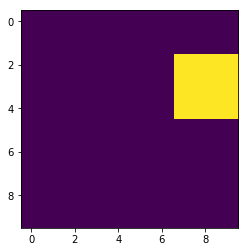

[[2 7]
 [2 8]
 [2 9]
 [3 7]
 [3 8]
 [3 9]
 [4 7]
 [4 8]
 [4 9]] (3.0, 8.0)


In [118]:
y= np.zeros([10,10], dtype='int')
y[2:5, 7:10] = 1
plt.imshow(y)
plt.show()
z=measure.regionprops(y)
print z[0].coords, z[0].centroid

In [120]:
[1,2,3]

1

In [132]:
a = [1]
for ind in a:
#     temp_ind
    a.append(ind+1)
#     a = list(set(a))
    if len(a)==10:
        break
        
print a

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [113]:
print y
y[z[0].coords[:,0], z[0].coords[:,1]]=0
print y

[[0 0 1 0 1 0 0 0 0 1]
 [0 1 0 0 0 0 0 1 1 0]
 [0 1 0 1 1 0 0 0 0 1]
 [1 0 1 1 0 1 0 0 0 1]
 [1 1 0 0 1 1 0 0 1 0]
 [1 0 1 1 1 1 0 1 0 0]
 [1 1 0 0 1 1 1 0 1 1]
 [1 1 1 1 0 0 0 1 1 1]
 [1 0 0 1 1 1 0 0 0 0]
 [1 0 1 0 1 0 1 1 1 0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [66]:
ind = 10
filt_cc = [obj for obj in cc if obj.complete and not(obj.daughter is None) and obj.celltype==0 and not obj.mother is None ]
print filt_cc[ind].frames, cc[filt_cc[ind].next_gen].frames,cc[filt_cc[ind].daughter].frames
print cc[filt_cc[ind].bud].frames, cc[filt_cc[ind].bud].celltype

AttributeError: 'CellCycle' object has no attribute 'mother'

In [15]:
x=np.array([1,2,3])
np.insert(x, 0, 0)
np.append(x, 1)
x+=1
print x

[2 3 4]


In [21]:
np.sum(x<3)

1

In [32]:
y=np.where(x>2)[0]
y-=1
x[y]

array([2, 3])

In [13]:
x=np.random.normal(0,1.0,20)
y=np.where(x>0)
print x, y

[ 0.31413778 -0.27004721 -0.46330855  0.08419464  0.91011109 -0.46874973
  1.77006367  0.58685531  1.27376579  0.90548062 -0.19211595 -0.88107449
  0.0582      1.25538253 -1.02977891  1.01939259  0.27008605  0.39651172
  1.23263336 -1.29962727] (array([ 0,  3,  4,  6,  7,  8,  9, 12, 13, 15, 16, 17, 18]),)


In [8]:
for i0 in range(1,2):
    print 'jio'

jio


In [2]:
expt='../180531_dye_mix_expt/timelapse'
scene,t=1,1
filename='/180531_60X_20lp_yFB43_yFB29dyed_yfp_10min_w2515 laser 20_s{0}_t{1}.TIF'.format(scene,t)
temp=io.imread(expt+'/scene_{0}/outputs/images/mask3d_s{1}_t{2}.TIF'.format(scene,scene,t))
temp1 = io.imread(expt+filename)

In [35]:
val = np.load(expt+'/scene_1/outputs/fl_loc_centres/scene_1_frame_30.npy')
val

array([[ 183.,  197.],
       [ 301.,  105.],
       [ 209.,   94.],
       [ 164.,   99.],
       [ 199.,  147.],
       [ 183.,  131.],
       [  39.,  256.],
       [  43.,  274.],
       [  44.,  298.],
       [  35.,  312.],
       [ 161.,  444.],
       [ 148.,  456.],
       [ 159.,  470.],
       [ 161.,  420.],
       [ 177.,  408.],
       [ 203.,  429.],
       [ 173.,  266.],
       [ 152.,  254.],
       [ 105.,  289.],
       [ 449.,  221.],
       [ 474.,  212.],
       [ 472.,  227.],
       [ 464.,  244.],
       [ 481.,  192.],
       [ 473.,  343.],
       [ 496.,  371.],
       [ 477.,  380.],
       [ 486.,  390.],
       [ 503.,  304.]])

In [37]:
x=(1,2)
len(x)

2

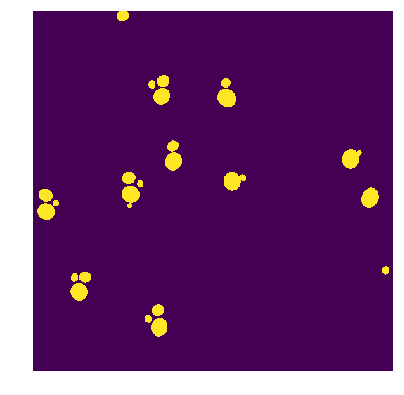

In [24]:
fig=plt.figure(figsize=[5,5],frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(np.amax(temp,axis=0),aspect='normal')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.show(fig)
fig.savefig('./temp.tif', bbox_inches=extent, pad_inches=0)

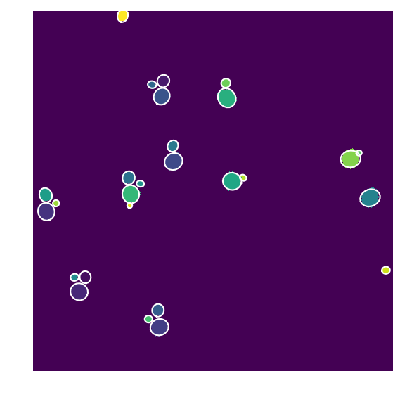

In [29]:
temp2 = io.imread('./frame_1.tif')
fig=plt.figure(figsize=[5,5],frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(temp2,aspect='normal')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.show(fig)

In [31]:
x=np.ones([10,10])
x[[3,5,7],[3,5,7]]=0
print x

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  0.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  0.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


In [ ]:
np.load()

In [32]:
y=[1,2,3]
y<2

False

In [24]:
base_path, expt_path = '/home/felix/Documents/image_analysis', '/180531_dye_mix_expt/timelapse'
label_path = '/180531_dye_mix_expt/initial_dyed_test'
scene=1
tracking_csv_file = pd.DataFrame.from_csv(base_path + label_path + '/scene_{0}.csv'.format(scene), index_col=None)

In [30]:
tracking_csv_file['X']

0    176
1    191
2    192
3    143
4    148
5    161
6    290
7    487
Name: X, dtype: int64

In [38]:
x=np.array([1,2,3])
x[(1)]

2

In [45]:
np.where(x>0)[0]

array([0, 1, 2])

In [72]:
base_path, expt_path = '/home/felix/Documents/image_analysis', '/180531_dye_mix_expt'
path = base_path+expt_path+'/timelapse/segments/tracking/tracking.csv'
temp = pd.DataFrame.from_csv(path, index_col=None)

In [79]:
temp.head()

,Frame_number,Cell_number,Cell_colour,Position_X,Position_Y,Unique_cell_number
0,2,1,-1,74.824,379.06,1
1,2,2,-1,185.880,100.11,2
2,2,3,-1,66.059,399.85,3
3,2,4,-1,19.385,285.79,4
4,2,5,-1,180.270,450.16,5


In [106]:
c=[]
len(c)

0

In [107]:
temp1 = temp[(temp['Frame_number']==1) & (temp[' Cell_number']==1)]

In [108]:
temp1

,Frame_number,Cell_number,Cell_colour,Position_X,Position_Y,Unique_cell_number


In [80]:
temp2 = temp1[temp1[' Cell_number']==5]

In [81]:
temp2

,Frame_number,Cell_number,Cell_colour,Position_X,Position_Y,Unique_cell_number
4,2,5,-1,180.27,450.16,5


In [86]:
temp2[' Unique_cell_number'].iloc[0]

5

In [64]:
temp1[:1][' Unique_cell_number'][0]

1

In [23]:
temp.columns

Index([u' Cell_number', u' Cell_colour', u' Position_X', u' Position_Y',
       u' Unique_cell_number'],
      dtype='object')

In [26]:
temp[' Frame_number']

KeyError: ' Frame_number'